In [19]:
# Import the necessary libraries
from optimus import Optimus
from pyspark.sql.functions import *
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
op = Optimus()

# Read the data and create Spark DF

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo_pd = pd.read_csv(url, sep = '\t')
chipo_pd[['item_name', 'choice_description', 'item_price']] = chipo_pd[['item_name', 'choice_description', 'item_price']].astype(str)

chipo = op.spark.createDataFrame(chipo_pd)

# See the first 10 entries

In [3]:
chipo.table(10)

order_id 1 (bigint) nullable,quantity 2 (bigint) nullable,item_name 3 (string) nullable,choice_description 4 (string) nullable,item_price 5 (string) nullable
1,1,Chips⋅and⋅Fresh⋅Tomato⋅Salsa,nan,$2.39⋅
1,1,Izze,[Clementine],$3.39⋅
1,1,Nantucket⋅Nectar,[Apple],$3.39⋅
1,1,Chips⋅and⋅Tomatillo-Green⋅Chili⋅Salsa,nan,$2.39⋅
2,2,Chicken⋅Bowl,"[Tomatillo-Red⋅Chili⋅Salsa⋅(Hot),⋅[Black⋅Beans,⋅Rice,⋅Cheese,⋅Sour⋅Cream]]",$16.98⋅
3,1,Chicken⋅Bowl,"[Fresh⋅Tomato⋅Salsa⋅(Mild),⋅[Rice,⋅Cheese,⋅Sour⋅Cream,⋅Guacamole,⋅Lettuce]]",$10.98⋅
3,1,Side⋅of⋅Chips,nan,$1.69⋅
4,1,Steak⋅Burrito,"[Tomatillo⋅Red⋅Chili⋅Salsa,⋅[Fajita⋅Vegetables,⋅Black⋅Beans,⋅Pinto⋅Bean...",$11.75⋅
4,1,Steak⋅Soft⋅Tacos,"[Tomatillo⋅Green⋅Chili⋅Salsa,⋅[Pinto⋅Beans,⋅Cheese,⋅Sour⋅Cream,⋅Lettuce]]",$9.25⋅
5,1,Steak⋅Burrito,"[Fresh⋅Tomato⋅Salsa,⋅[Rice,⋅Black⋅Beans,⋅Pinto⋅Beans,⋅Cheese,⋅Sourͺ...",$9.25⋅


# Create a histogram of the top 5 items bought

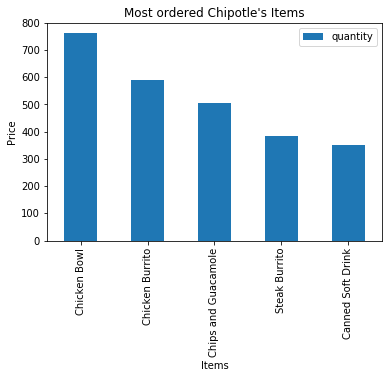

In [39]:
(chipo.groupby("item_name")
      .sum("quantity")
      .cols.rename("sum(quantity)", "quantity")
      .sort(desc("quantity"))
      .toPandas()[0:5].plot(kind="bar"))

x_labels = [row.item_name for row in (chipo.groupby("item_name")
      .sum("quantity")
      .cols.rename("sum(quantity)", "quantity")
      .sort(desc("quantity"))
      .select("item_name")
      .collect())][0:5]

plt.xticks(np.arange(5), x_labels)
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

# Create a scatterplot with the number of items orderered per order price

In [40]:
# Use substr (like in SQL) to get from the first numer to the end and then cast it
chipo = chipo.withColumn("item_price", chipo.item_price.substr(2,10).cast("float"))

In [41]:
chipo.table(5)

order_id 1 (bigint) nullable,quantity 2 (bigint) nullable,item_name 3 (string) nullable,choice_description 4 (string) nullable,item_price 5 (float) nullable
1,1,Chips⋅and⋅Fresh⋅Tomato⋅Salsa,nan,2.390000104904175
1,1,Izze,[Clementine],3.390000104904175
1,1,Nantucket⋅Nectar,[Apple],3.390000104904175
1,1,Chips⋅and⋅Tomatillo-Green⋅Chili⋅Salsa,nan,2.390000104904175
2,2,Chicken⋅Bowl,"[Tomatillo-Red⋅Chili⋅Salsa⋅(Hot),⋅[Black⋅Beans,⋅Rice,⋅Cheese,⋅Sour⋅Cream]]",16.979999542236328


In [47]:
orders = chipo.groupby('order_id').sum().cols.rename([ ("sum(quantity)",("quantity")), ("sum(item_price)",("item_price"))])

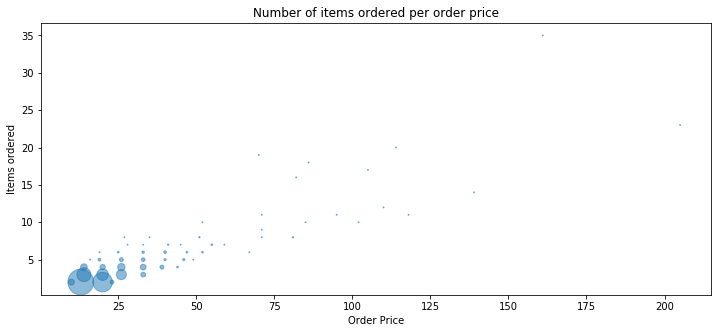

In [52]:
orders.plot.scatter(["item_price", "quantity"])
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()